# Seaborn example by PyCall/Ruby

[Seaborn example gallery](https://seaborn.pydata.org/examples/index.html)

In [1]:
RUBY_DESCRIPTION 

"ruby 3.1.1p18 (2022-02-18 revision 53f5fc4236) [x86_64-darwin20]"

In [2]:
require 'pycall'
PyCall::VERSION

"1.4.1"

In [3]:
require 'numpy'
np = Numpy
np.__version__

"1.22.3"

In [5]:
require 'pandas'
pd = Pandas
pd.__version__

"1.4.2"

In [6]:
require 'matplotlib'
require 'matplotlib/iruby'
Matplotlib::IRuby.activate
plt = Matplotlib::pyplot
Matplotlib.__version__

"3.5.1"

In [7]:
sns = PyCall.import_module('seaborn')
sns.__version__

"0.11.2"

### Anscombe's quartet
https://seaborn.pydata.org/examples/anscombes_quartet.html

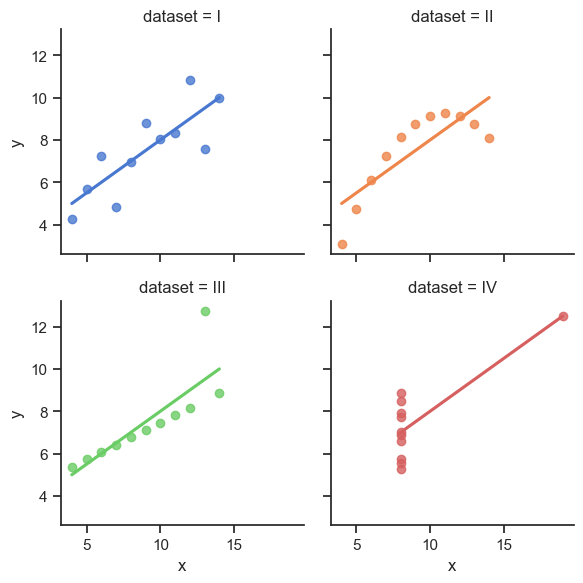

In [8]:
sns.set_theme(style:'ticks')
df = sns.load_dataset('anscombe')

sns.lmplot(
  data:df,
  x:'x', y:'y', hue:'dataset',
  col:'dataset', col_wrap:2,
  ci:nil, palette:"muted", height:3,
)

### Scatterplot with multiple semantics
https://seaborn.pydata.org/examples/different_scatter_variables.html

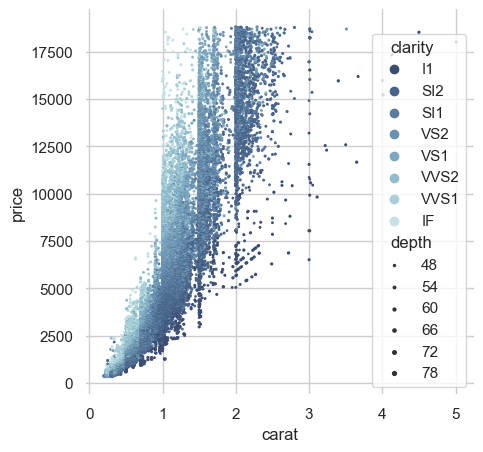

In [9]:
sns.set_theme(style:'whitegrid')
diamonds = sns.load_dataset('diamonds')

f, ax = plt.subplots(figsize:[5, 5])
clarity_ranking = %w[I1 SI2 SI1 VS2 VS1 VVS2 VVS1 IF]
sizes = PyCall::Tuple.new(1, 8)
sns.scatterplot(
  ax:ax, data:diamonds, 
  x:'carat', y:'price',
  hue:'clarity', size:'depth',
  palette:"ch:r=-0.2, d=0.3_r",
  hue_order:clarity_ranking,
  sizes:sizes , linewidth:0,
)
sns.despine(f, left:true, bottom:true)

### Timeseries plot with error bands
https://seaborn.pydata.org/examples/errorband_lineplots.html

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

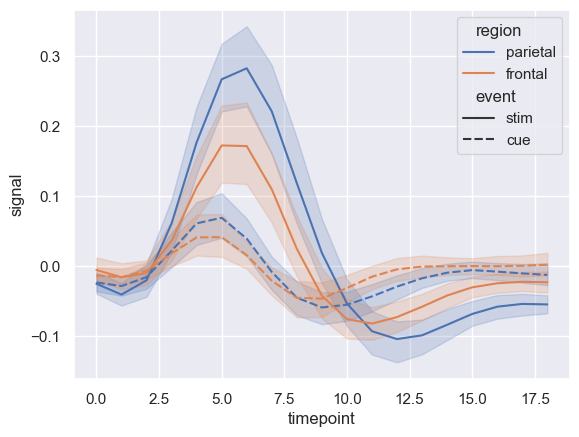

In [10]:
sns.set_theme(style:'darkgrid')
fmri = sns.load_dataset('fmri')

sns.lineplot(
  data:fmri,
  x:'timepoint', y:'signal',
  hue:'region', style:'event'
)

### Facetting histograms by subsets of data
https://seaborn.pydata.org/examples/faceted_histogram.html

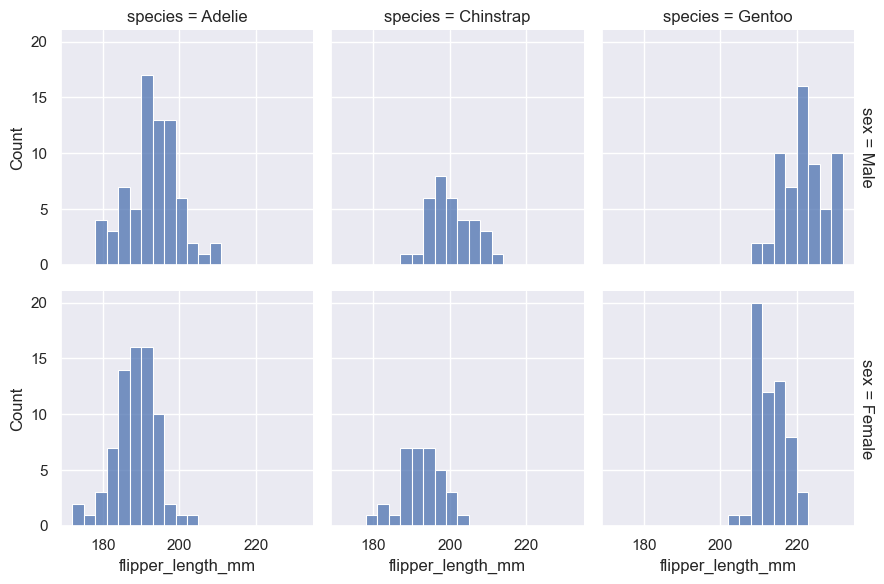

In [11]:
sns.set_theme(style:'darkgrid')
penguins = sns.load_dataset('penguins')

sns.displot(
  data:penguins,
  x:'flipper_length_mm',
  row:'sex', col:'species',
  binwidth:3, height:3,
  facet_kws:{margin_titles:true},
)

### Line plots on multiple facets
https://seaborn.pydata.org/examples/faceted_lineplot.html

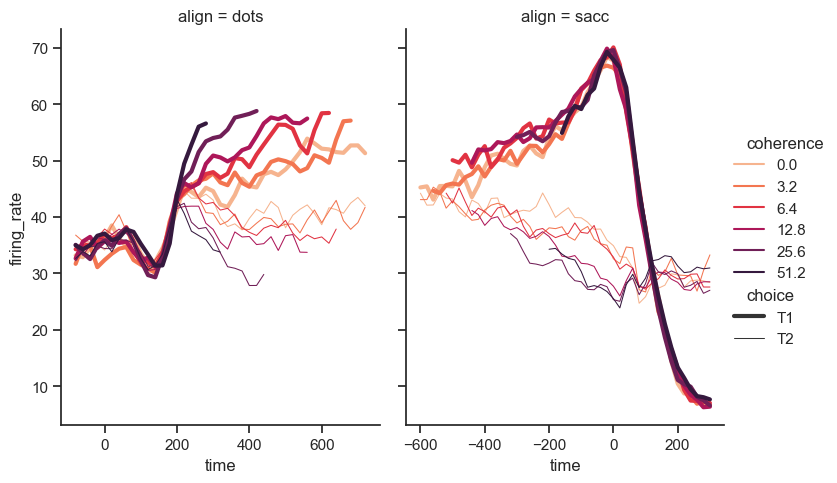

In [12]:
sns.set_theme(style:'ticks')
dots = sns.load_dataset('dots')

palette = sns.color_palette("rocket_r")
sns.relplot(
  data:dots, kind:'line',
  x:'time', y:'firing_rate', col:'align',
  hue:'coherence', palette:palette,
  size:'choice', size_order:%w[T1 T2],
  height:5, aspect:0.75,
  facet_kws:{sharex:false},
)

### Grouped barplots
https://seaborn.pydata.org/examples/grouped_barplot.html

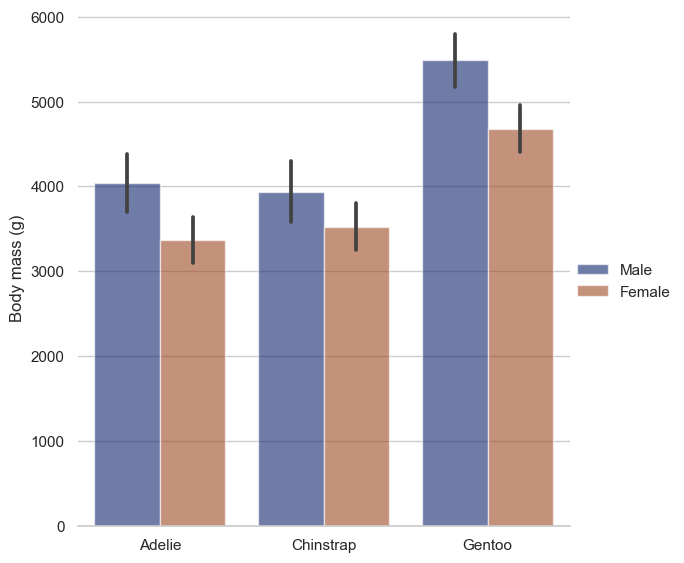

In [13]:
sns.set_theme(style:'whitegrid')
penguins = sns.load_dataset('penguins')

sns.catplot(
  data:penguins, kind:'bar',
  x:'species', y:'body_mass_g',
  hue:'sex',
  ci:'sd',
  palette:'dark', alpha:0.6, height:6,
).despine(left:true)
 .set_axis_labels("", "Body mass (g)")
 .legend.set_title("")

### Grouped boxplots
https://seaborn.pydata.org/examples/grouped_boxplot.html

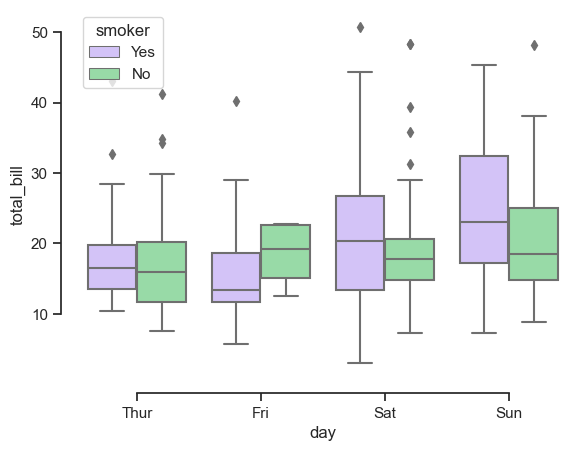

In [14]:
sns.set_theme(style:'ticks', palette:'pastel')
tips = sns.load_dataset('tips')

sns.boxplot(
  data:tips,
  x:'day', y:'total_bill', hue:'smoker',
  palette:%w[m g],
)
sns.despine(offset:10, trim:true)

### Grouped violinplots with split violins
https://seaborn.pydata.org/examples/grouped_violinplots.html

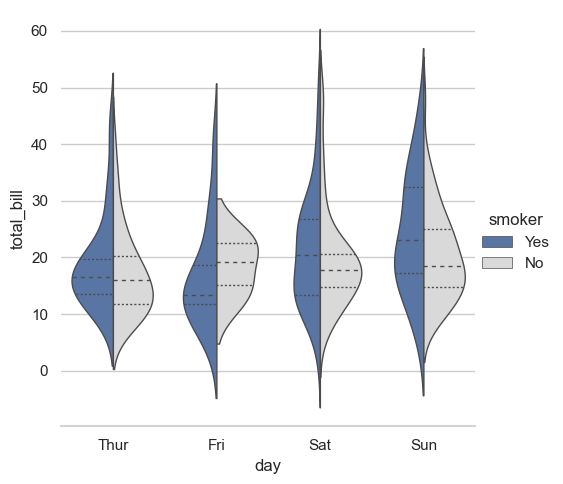

In [15]:
sns.set_theme(style:'whitegrid')
tips = sns.load_dataset('tips')

sns.catplot(   # Used catplot to locate legend outside
  data:tips, kind:'violin',
  x:'day', y:'total_bill', hue:'smoker',
  split:true, inner:'quart', linewidth:1,
  palette:{Yes:"b", No:"0.85"},
)
sns.despine(left:true)

### Scatterplot heatmap
https://seaborn.pydata.org/examples/heat_scatter.html

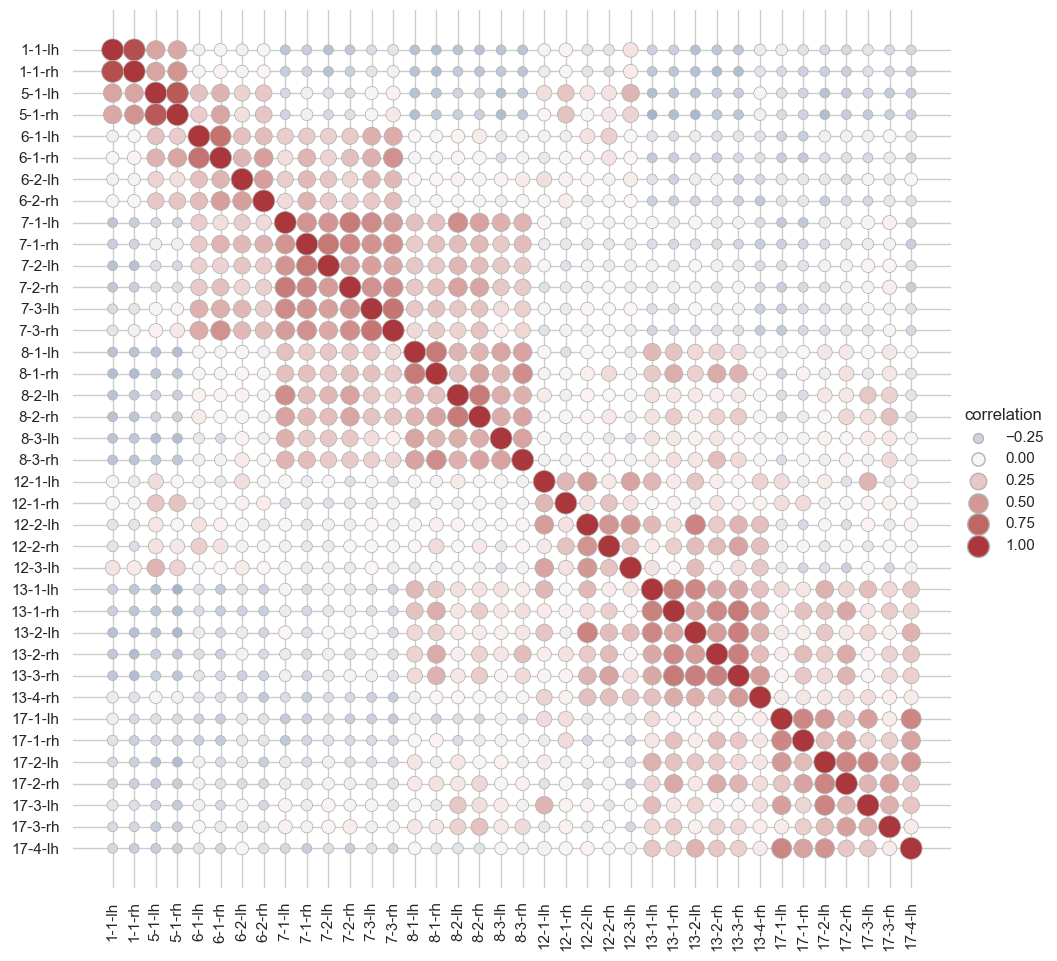

In [16]:
sns.set_theme(style:'whitegrid')

def tuple(*args)
  PyCall::Tuple.new(*args)
end

df = sns.load_dataset('brain_networks', header:[0,1,2], index_col:0)
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network").astype(:int).isin(used_networks))
df = df.loc[(0..-1), used_columns]
df.columns = df.columns.__array__.to_a.map {|i| i.to_a.join("-")}
corr_mat = df.corr.stack.reset_index(name:'correlation')

g = sns.relplot(
  data:corr_mat,
  x:'level_0', y:'level_1',
  hue:'correlation', size:'correlation',
  palette:'vlag', hue_norm:tuple(-1,1), edgecolor:"0.7",
  height:10, sizes:tuple(50, 250), size_norm:tuple(-0.2, 0.8),
).set(xlabel:"", ylabel:"", aspect:'equal',
).despine(left:true, bottom:true)
g.ax(margins:0.02)
g.ax.get_xticklabels.each {|label| label.set_rotation(90)}
g.legend.legendHandles.each {|artist| artist.set_edgecolor("0.7")}
g

### Hexbin plot with marginal distributions
https://seaborn.pydata.org/examples/hexbin_marginals.html

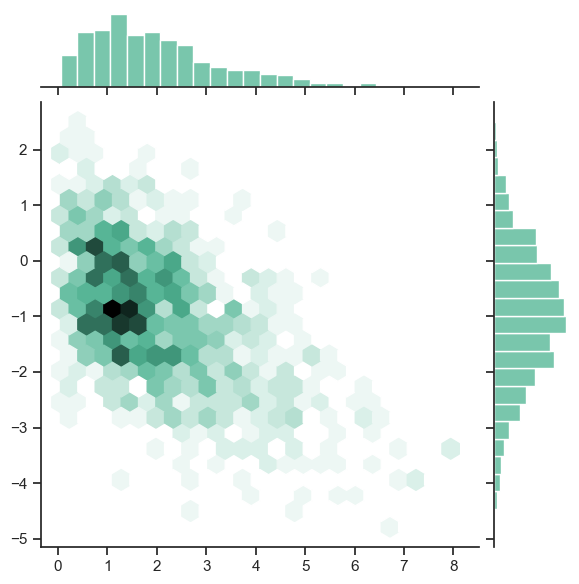

In [17]:
sns.set_theme(style:'ticks')
rs = np.random.RandomState.new(11)
x = rs.gamma(2, size:1000)
y = -0.5 * x + rs.normal(size:1000)

sns.jointplot(x:x, y:y, kind:'hex', color:"#4CB391")

### Stacked histogram on a log scale
https://seaborn.pydata.org/examples/histogram_stacked.html

<AxesSubplot:xlabel='price', ylabel='Count'>

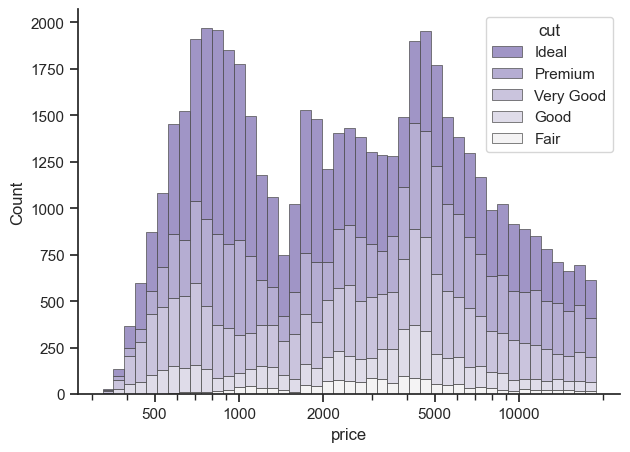

In [18]:
sns.set_theme(style:'ticks')
diamonds = sns.load_dataset('diamonds')

f, ax = plt.subplots(figsize:[7, 5])
sns.despine(f)

sns.histplot(
  data:diamonds,
  x:'price', hue:'cut',
  multiple:'stack',
  palette:"light:m_r", edgecolor:"0.3", linewidth:0.5,
  log_scale:true,
)
ax.xaxis.set_major_formatter(Matplotlib.ticker.ScalarFormatter.new)
ax.set_xticks([500, 1000, 2000, 5000, 10000])
ax

### Horizontal boxplot with observations
https://seaborn.pydata.org/examples/horizontal_boxplot.html

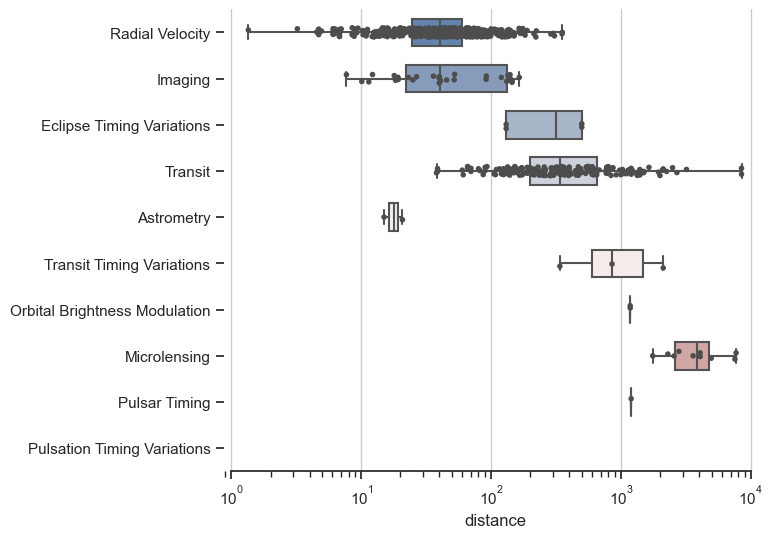

In [19]:
sns.set_theme(style:'ticks')
planets = sns.load_dataset('planets')

f, ax = plt.subplots(figsize:[7, 6])
ax.set_xscale('log')

sns.boxplot(data:planets,
  x:'distance', y:'method',
  whis:[0,100], width:0.6, palette:"vlag",
)
sns.stripplot(
  data:planets,
  x:'distance', y:'method',
  size:4, color:"0.3", linewidth:0,
)
ax.xaxis.grid(true)
ax.set(ylabel: "")
sns.despine(trim:true, left:true)

### Conditional means with observations
https://seaborn.pydata.org/examples/jitter_stripplot.html

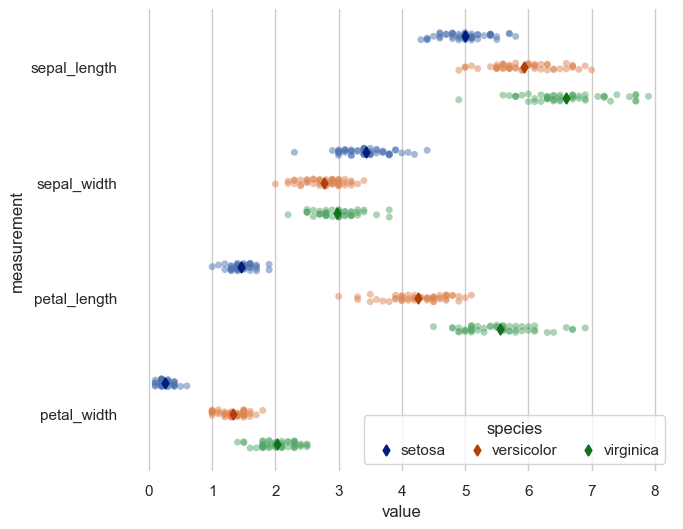

In [20]:
sns.set_theme(style:'whitegrid')
iris = sns.load_dataset('iris')
iris = pd.melt(iris, :species, var_name:'measurement')

f, ax = plt.subplots(figsize:[7, 6])
sns.despine(bottom:true, left:true)
sns.stripplot(
  data: iris,
  x:'value', y:'measurement', hue:'species',
  dodge:true, alpha:0.5, zorder:1,
)
sns.pointplot(
  data:iris,
  x:'value', y:'measurement', hue:'species',
  dodge:0.8-0.8/3, join:false,
  palette:"dark", markers:"d", scale:0.75, ci:nil,
)
handles, labels = ax.get_legend_handles_labels
ax.legend(
  handles[3..], labels[3..],
  title:'species',
  handletextpad:0, columnspacing:1,
  loc:"lower right", ncol:3, frameon:true,
)

### Joint and marginal histograms
https://seaborn.pydata.org/examples/joint_histogram.html

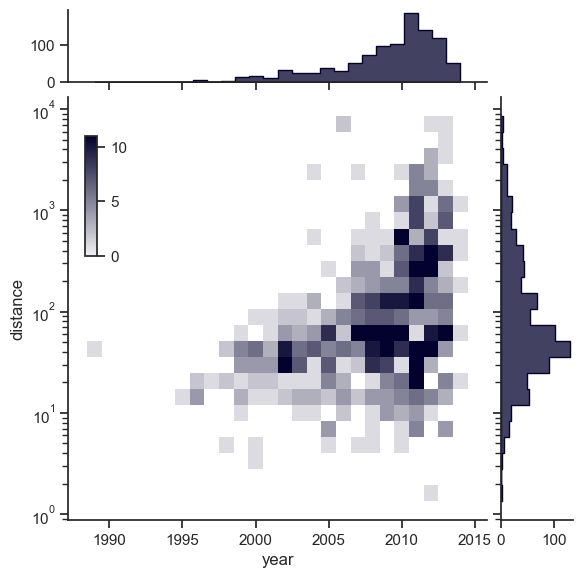

In [21]:
sns.set_theme(style:'ticks')
planets = sns.load_dataset('planets')
color = "#03012d"

g = sns.JointGrid.new(
  data:planets,
  x:'year', y:'distance',
  marginal_ticks:true
)
g.ax_joint.set(yscale:'log')
cax = g.figure.add_axes([0.15, 0.55, 0.02, 0.2])
g.plot_joint(
  func: PyCall.getattr(sns, :histplot),
  discrete:[true, false],
  cmap:"light:#{color}",
  pmax:0.8,
  cbar:true, cbar_ax:cax,
)
g.plot_marginals(
  func: PyCall.getattr(sns, :histplot),
  element:'step',
  color:color,
)

### Joint kernel density estimate
https://seaborn.pydata.org/examples/joint_kde.html

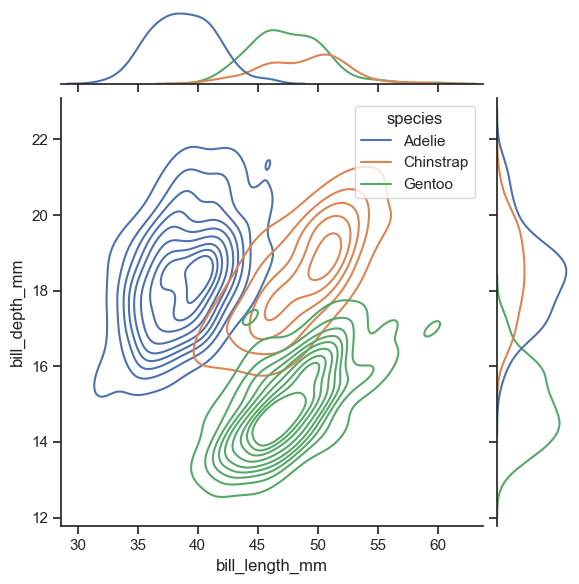

In [22]:
sns.set_theme(style:'ticks')
penguins = sns.load_dataset('penguins')

g = sns.jointplot(
  data:penguins, kind:'kde',
  x:'bill_length_mm', y:'bill_depth_mm', hue:'species',
)

### Overlapping densities (‘ridge plot’)
https://seaborn.pydata.org/examples/kde_ridgeplot.html

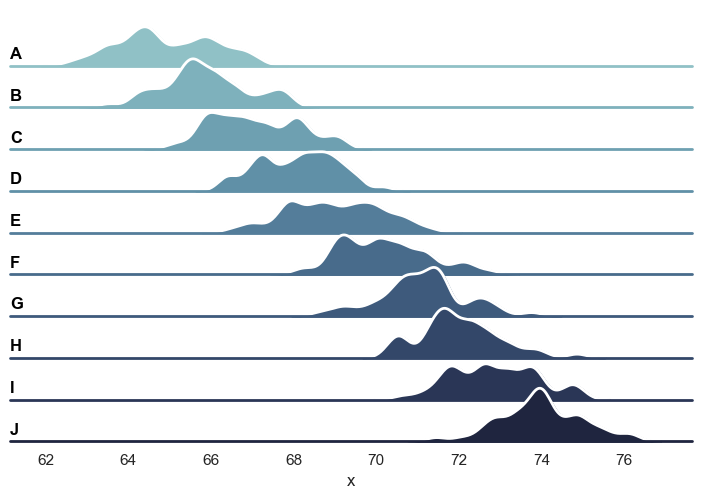

In [23]:
sns.set_theme(style:'white', rc:{"axes.facecolor":[0, 0, 0, 0]})

rs = np.random.RandomState.new(1979)
x = rs.randn(500)
g = np.tile("ABCDEFGHIJ".split(''), 50)
df = pd.DataFrame.new(PyCall::Dict.new(x:x, g:g))
m = df.g.__array__.to_a.map(&:ord)
df.x += m

pal = sns.cubehelix_palette(10, rot:-0.25, light:0.7)
g = sns.FacetGrid.new(
  data:df,
  row:'g', hue:'g',
  aspect:15, height:0.5, palette:pal,
)

g.map(PyCall.getattr(sns, :kdeplot), 'x',
  fill:true, alpha:1, linewidth:1.5,
  bw_adjust:0.5, clip_on:false,
)
g.map(PyCall.getattr(sns, :kdeplot), 'x',
  color:"w", linewidth:2,
  bw_adjust:0.5, clip_on:false,
)
g.refline(y:0, linewidth:2, linestyle:"-", color:nil, clip_on:false)

g.axes.flatten.to_a.zip("ABCDEFGHIJ".split(//)) do |ax, label|
  ax.text(0, 0.2, label, fontweight:"bold", color: "0",
          ha:"left", va:"center", transform:ax.transAxes)  
end

g.figure.subplots_adjust(hspace:-0.25)
g.set_titles("")
g.set(yticks:[], ylabel:"")
g.despine(bottom:true, left:true)

### Plotting large distributions
https://seaborn.pydata.org/examples/large_distributions.html

<AxesSubplot:xlabel='clarity', ylabel='carat'>

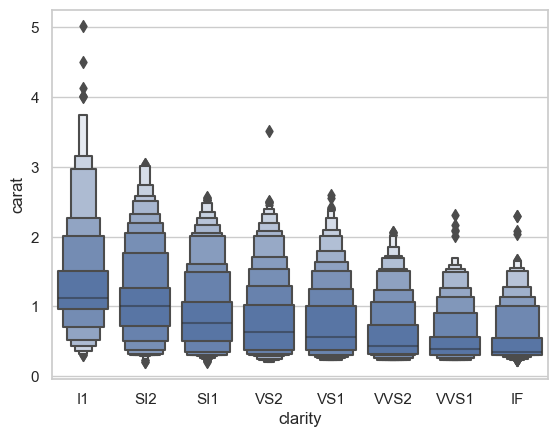

In [24]:
sns.set_theme(style:'whitegrid')
diamonds = sns.load_dataset('diamonds')

clarity_ranking = %w[I1 SI2 SI1 VS2 VS1 VVS2 VVS1 IF]
sns.boxenplot(
  data:diamonds,
  x:'clarity', y:'carat',
  color:"b", order:clarity_ranking,
  scale:'linear',
)

### Bivariate plot with multiple elements
https://seaborn.pydata.org/examples/layered_bivariate_plot.html

<AxesSubplot:>

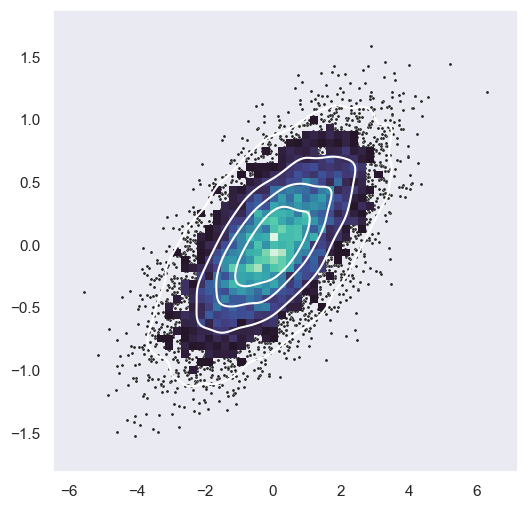

In [25]:
sns.set_theme(style:'dark')
n = 10_000
mean = [0, 0]
cov = [[2, 0.4], [0.4, 0.2]]
rng = np.random.RandomState.new(0)
x, y = rng.multivariate_normal(mean, cov, n).T.to_a

f, ax = plt.subplots(figsize:[6, 6])
sns.scatterplot(x:x, y:y, s:5, color:"0.15")
sns.histplot(x:x, y:y, bins:50, pthresh:0.1, cmap:"mako")
sns.kdeplot(x:x, y:y, levels:5, color:"w", linewidth:0.1)

### Faceted logistic regression
https://seaborn.pydata.org/examples/logistic_regression.html

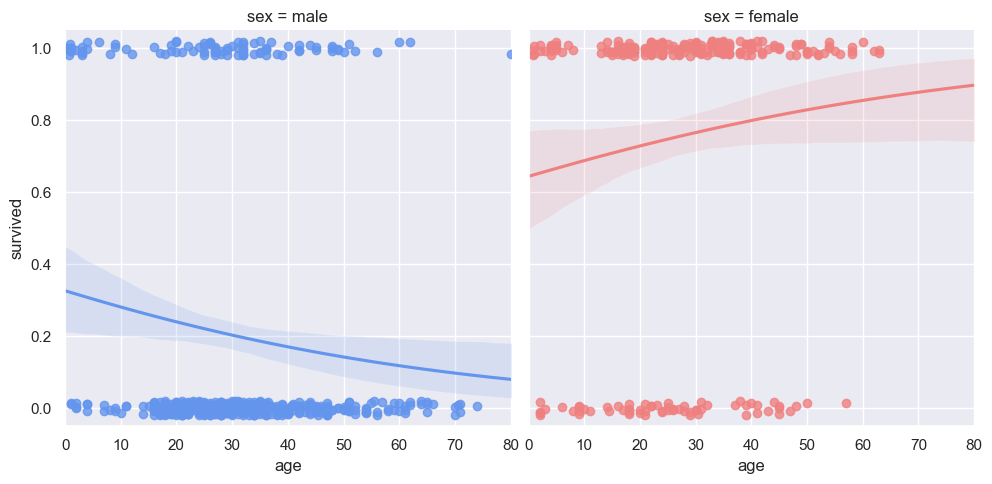

In [26]:
sns.set_theme(style:'darkgrid')
titanic = sns.load_dataset('titanic')

g = sns.lmplot(
  data:titanic,
  x:'age', y:'survived', col:'sex', hue:'sex',
  palette: {male:"#6495ED", female:"#F08080"},
  y_jitter:0.02, logistic:true, truncate:false,
).set(xlim:[0, 80], ylim:[-0.05, 1.05])

### Plotting on a large number of facets
https://seaborn.pydata.org/examples/many_facets.html

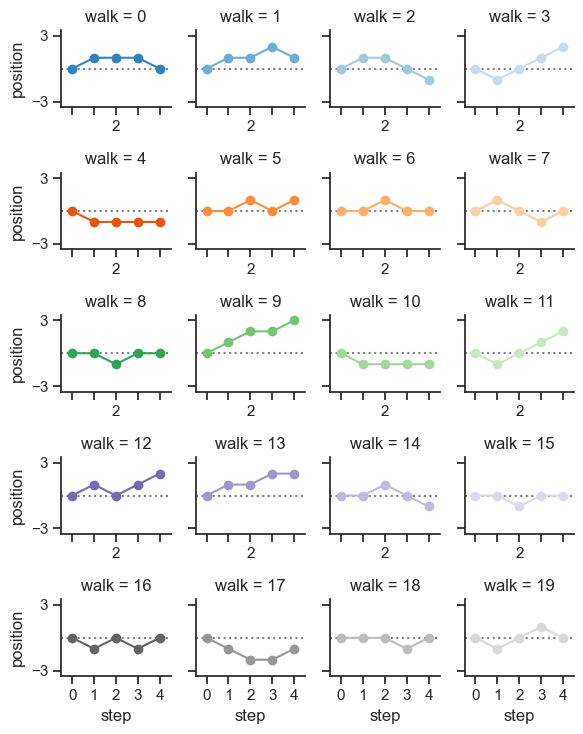

In [27]:
sns.set_theme(style:'ticks')

rs = np.random.RandomState.new(4)
pos = rs.randint(-1, 2, [20,5]).cumsum(axis:1)
pos -= pos[(0..-1), 0, np.newaxis]
step = [*0...5] * 20
walk = [*0...20].flat_map {|i| [i]*5}
df = pd.DataFrame.new(np.stack([pos.flat, step, walk], axis:1),
                      columns:%w[position step walk])

g = sns.FacetGrid.new(
  data:df,
  col:'walk', hue:'walk',
  palette:"tab20c", col_wrap:4, height:1.5,
)
g.refline(y:0, linestyle:":")
g.map(PyCall.getattr(plt, :plot), 'step', 'position', marker:"o")
g.set(
  xticks:np.arange(5), yticks:[-3, 3],
  xlim:[-0.5, 4.5], ylim:[-3.5, 3.5]
)
g.fig.tight_layout(w_pad:1)

### Plotting a diagonal correlation matrix
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<AxesSubplot:>

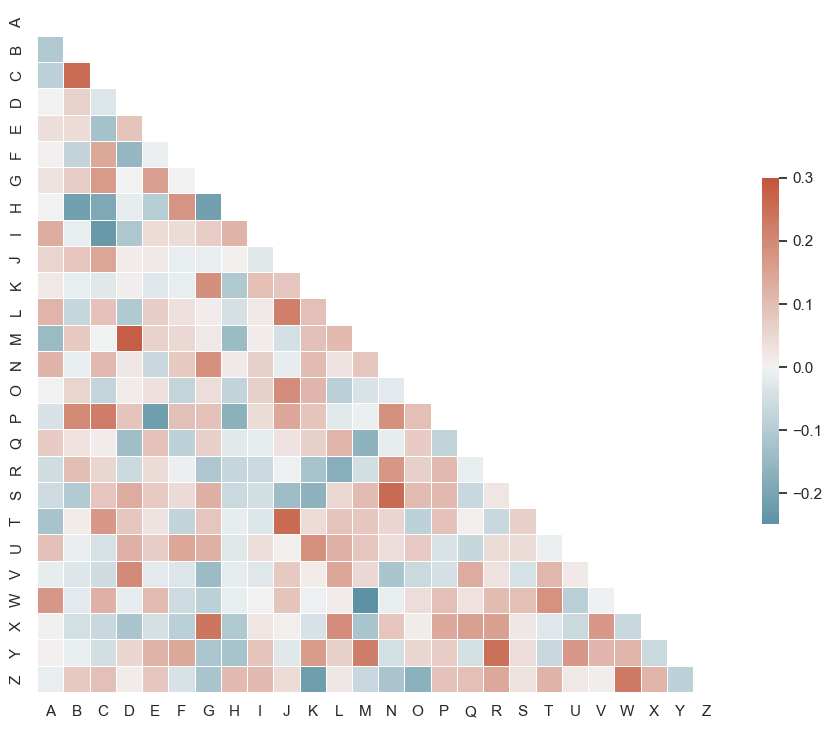

In [28]:
sns.set_theme(style:'white')
rs = np.random.RandomState.new(33)
d = pd.DataFrame.new(data: rs.normal(size:[100,26]), columns:[*'A'..'Z'])
corr = d.corr
mask = np.triu(np.ones_like(corr, dtype:"bool"))

f, ax = plt.subplots(figsize:[11, 9])
cmap = sns.diverging_palette(220, 20, as_cmap:true)
sns.heatmap(
  data:corr,
  cmap:cmap, mask:mask, vmax:0.3, center:0,
  square:true, linewidth:0.5,
  cbar_kws:{shrink:0.5},
)

### Scatterplot with marginal ticks
https://seaborn.pydata.org/examples/marginal_ticks.html

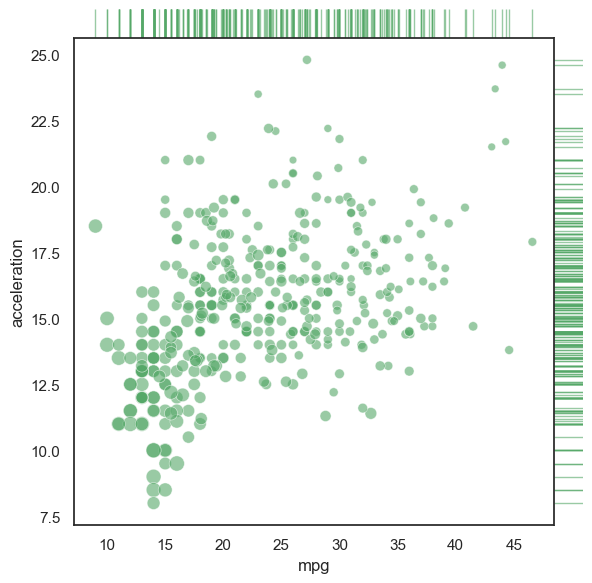

In [29]:
sns.set_theme(style:'white', color_codes:true)
mpg = sns.load_dataset('mpg')

g = sns.JointGrid.new(data:mpg, x:'mpg', y:'acceleration', space:0, ratio:17)
g.plot_joint(
  func: PyCall.getattr(sns, :scatterplot),
  size: mpg.horsepower,
  sizes: PyCall::Tuple.new(30, 120),
  color:"g", alpha:0.6, legend:false,
)
g.plot_marginals(
  func: PyCall.getattr(sns, :rugplot),
  height:1, color:"g", alpha:0.6,
)

### Multiple bivariate KDE plots
https://seaborn.pydata.org/examples/multiple_bivariate_kde.html

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

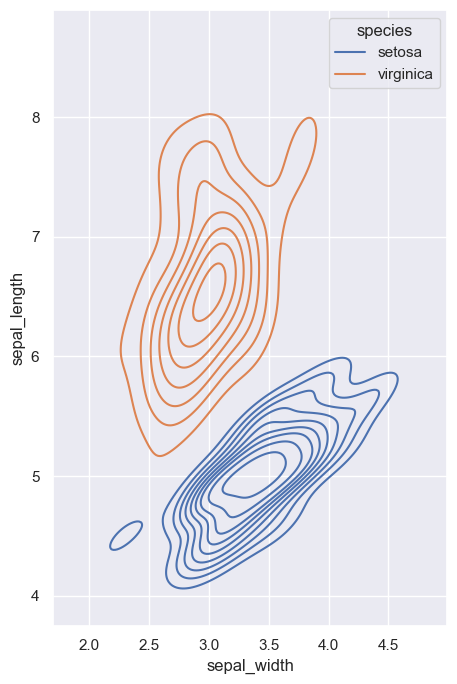

In [30]:
sns.set_theme(style:'darkgrid')
iris = sns.load_dataset('iris')

f, ax = plt.subplots(figsize:[8, 8])
ax.set_aspect(:equal)

sns.kdeplot(
  data: iris[iris[:species] != 'versicolor'],
  x:'sepal_width', y:'sepal_length',
  hue:'species',
  thresh:0.1,
)

### Conditional kernel density estimate
https://seaborn.pydata.org/examples/multiple_conditional_kde.html

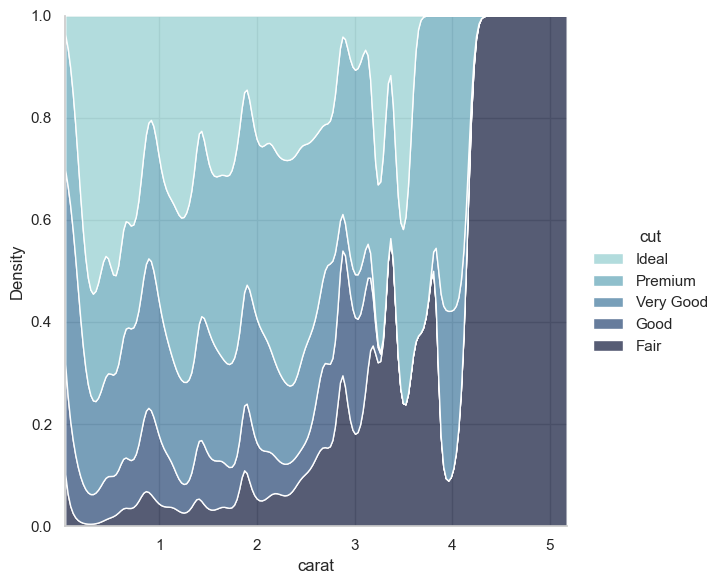

In [31]:
sns.set_theme(style:'whitegrid')
diamonds = sns.load_dataset('diamonds')

sns.displot(
  data:diamonds, kind:'kde',
  x:'carat', hue:'cut',
  multiple:"fill", clip:[0, nil],
  height:6,
  palette:"ch:rot=-.25,hue=1,light=.75",
)

### Facetted ECDF plots
https://seaborn.pydata.org/examples/multiple_ecdf.html

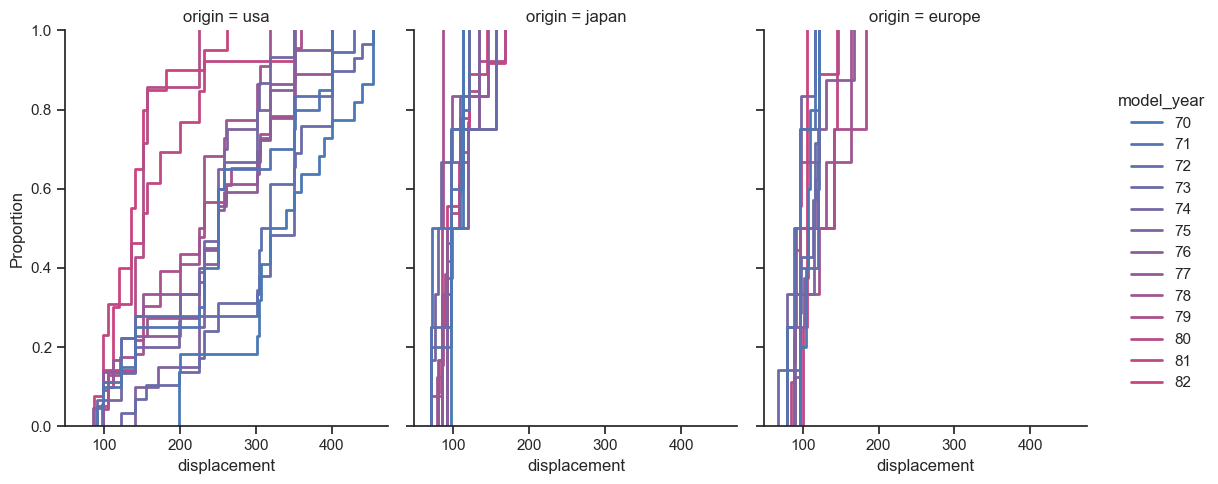

In [32]:
sns.set_theme(style:'ticks')
mpg = sns.load_dataset('mpg')

colors = [[250, 70, 50], [350, 70, 50]]
cmap = sns.blend_palette(colors, input:'husl', as_cmap:true)

sns.displot(
  data:mpg,
  x:'displacement', col:'origin', hue:'model_year',
  kind:'ecdf', aspect:0.75, linewidth:2, palette:cmap,
)

### Multiple linear regression
https://seaborn.pydata.org/examples/multiple_regression.html

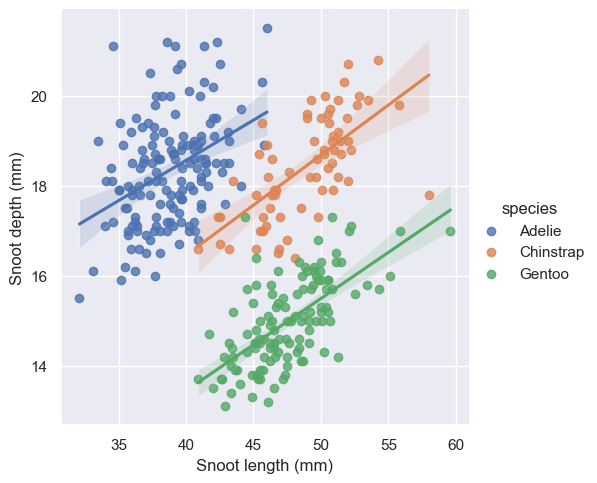

In [33]:
sns.set_theme
penguins = sns.load_dataset('penguins')

sns.lmplot(
  data:penguins,
  x:'bill_length_mm', y:'bill_depth_mm',
  hue:'species',
).set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

### Paired density and scatterplot matrix
https://seaborn.pydata.org/examples/pair_grid_with_kde.html

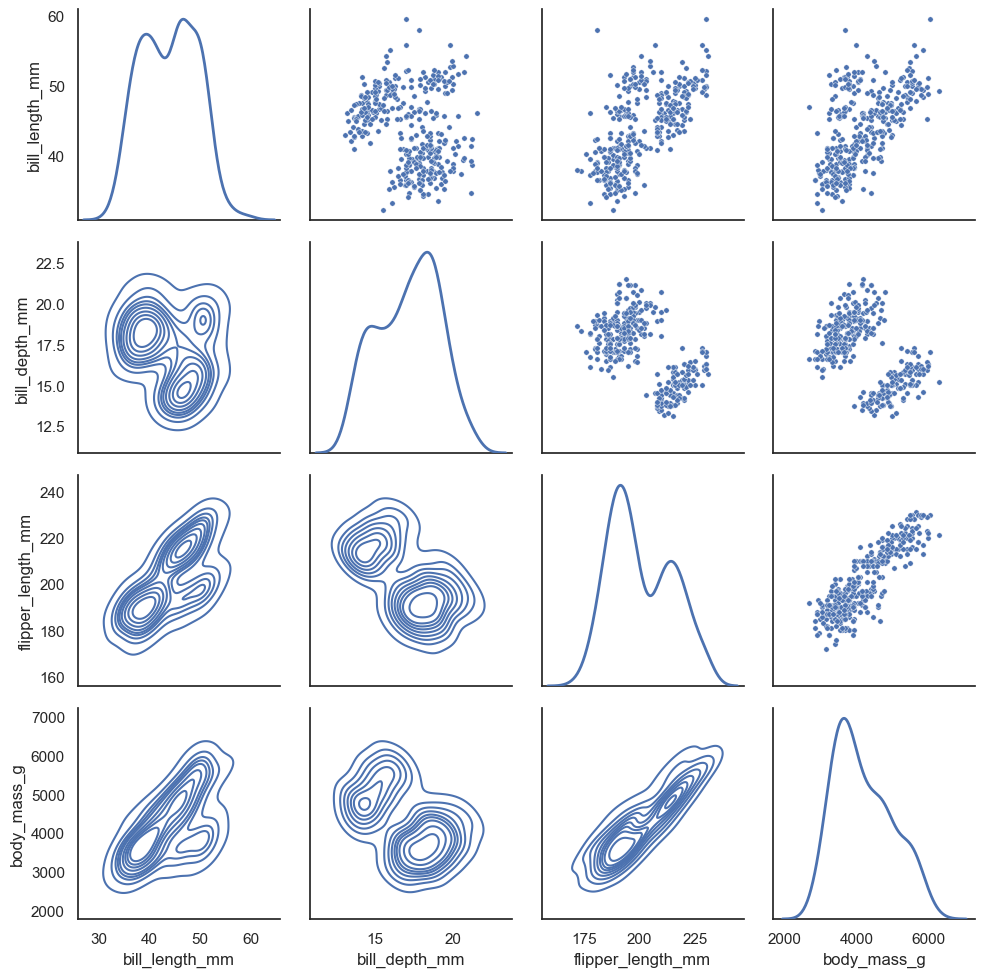

In [34]:
sns.set_theme(style:'white')
penguins = sns.load_dataset('penguins')

g = sns.PairGrid.new(data:penguins, diag_sharey:false)
g.map_upper(PyCall.getattr(sns, :scatterplot), s:15)
g.map_lower(PyCall.getattr(sns, :kdeplot))
g.map_diag(PyCall.getattr(sns, :kdeplot), lw:2)

### Paired categorical plots
https://seaborn.pydata.org/examples/paired_pointplots.html

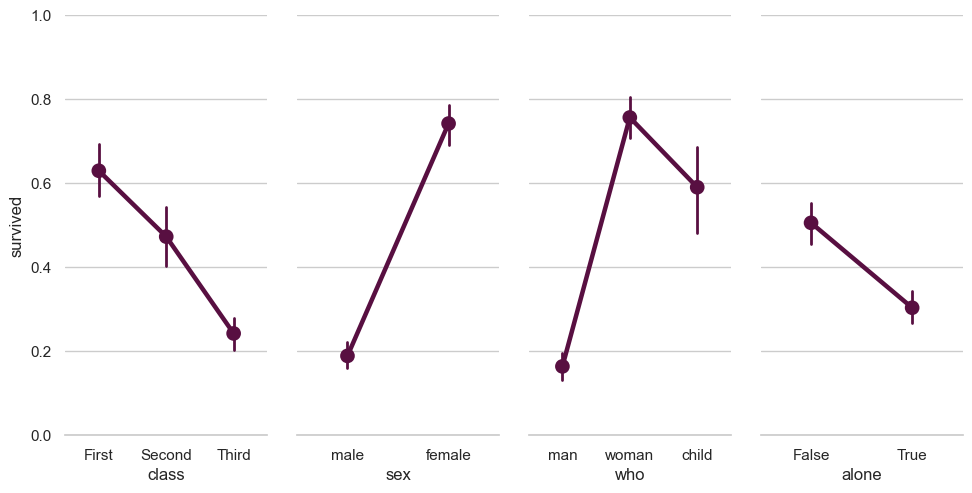

In [35]:
sns.set_theme(style:'whitegrid')
titanic = sns.load_dataset('titanic')

g = sns.PairGrid.new(
  data:titanic,
  x_vars:%w[class sex who alone],
  y_vars:'survived',
  height:5, aspect:0.5,
).map(PyCall.getattr(sns, :pointplot),
  scale:1.2, errwidth:2,
  color:"xkcd:plum",
).set(ylim:[0,1])
sns.despine(left:true)

### Dot plot with several variables
https://seaborn.pydata.org/examples/pairgrid_dotplot.html

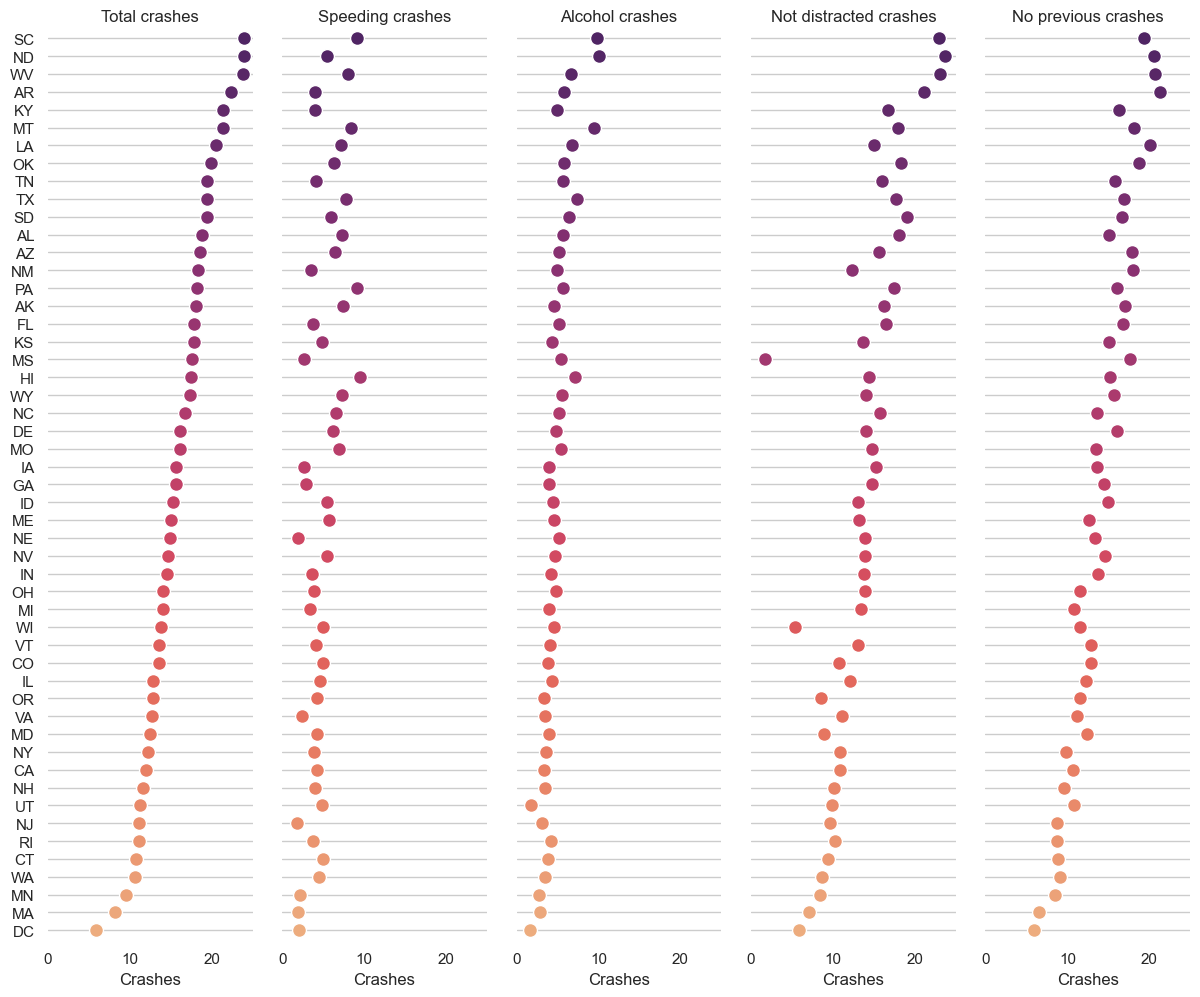

In [36]:
sns.set_theme(style:'whitegrid')
crashes = sns.load_dataset('car_crashes')
df = crashes.sort_values(:total, ascending:false)

g = sns.PairGrid.new(
  data:df,
  x_vars:df.columns[0..-4],
  y_vars:'abbrev',
  height:10, aspect:0.25
).map(
  func:PyCall.getattr(sns, :stripplot),
  size:10, orient:'h', jitter:false,
  palette:"flare_r",
  linewidth:1, edgecolor: "w"
).set(
  xlim:[0, 25], xlabel:"Crashes", ylabel:""
)
titles = ["Total crashes", "Speeding crashes", "Alcohol crashes",
          "Not distracted crashes", "No previous crashes"]
titles.zip(g.axes.to_a.flatten) do |title, ax|
  ax.set(title:title)
  ax.xaxis.grid(false)
  ax.yaxis.grid(true)
end
sns.despine(left:true, bottom:true)

### Color palette choices
https://seaborn.pydata.org/examples/palette_choices.html

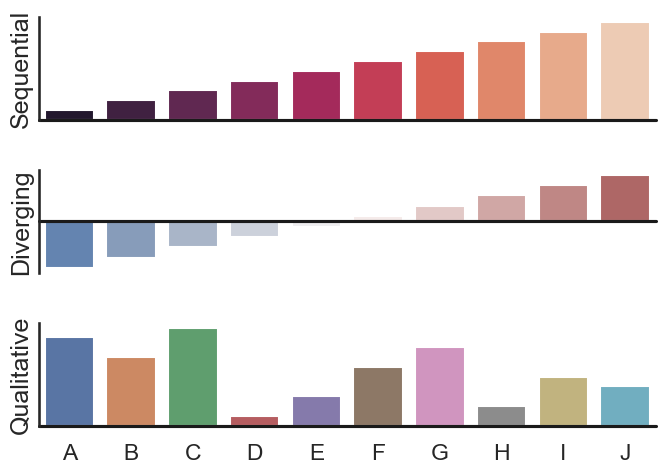

In [37]:
sns.set_theme(style:'white', context:'talk')
rs = np.random.RandomState.new(8)

f, ax = plt.subplots(3, 1, figsize:[7, 5], sharex:true)
ax1, ax2, ax3 = *ax

x = np.array("ABCDEFGHIJ".split(//))
y1 = np.arange(1, 11)
sns.barplot(ax:ax1, x:x, y:y1, palette:"rocket")
ax1.axhline(0, color:"k", clip_on:false)
ax1.set_ylabel("Sequential")

y2 = y1 - 5.5
sns.barplot(ax:ax2, x:x, y:y2, palette:"vlag")
ax2.axhline(0, color:"k", clip_on:false)
ax2.set_ylabel("Diverging")

y3 = rs.choice(y1, y1.size, replace:false)
sns.barplot(ax:ax3, x:x, y:y3, palette:"deep")
ax3.axhline(0, color:"k", clip_on:false)
ax3.set_ylabel("Qualitative")

sns.despine(bottom:true)
plt.setp(f.axes, yticks:[])
plt.tight_layout(h_pad:2)

### Different cubehelix palettes
https://seaborn.pydata.org/examples/palette_generation.html

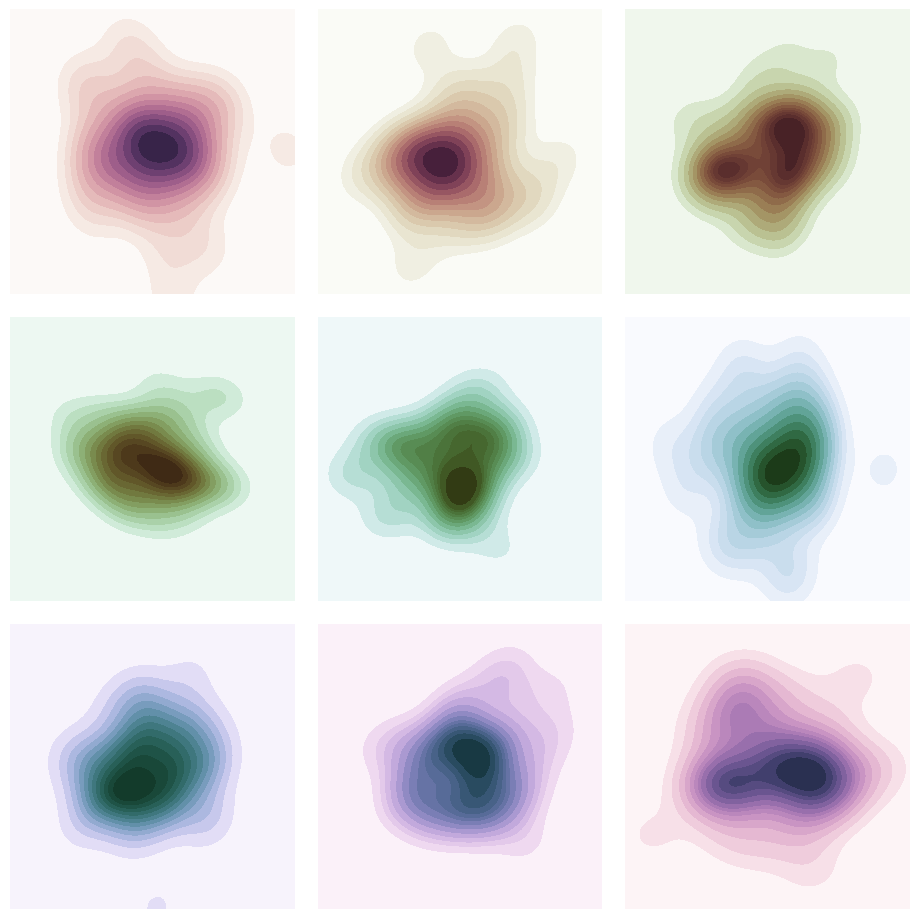

In [38]:
sns.set_theme(style:'white')
rs = np.random.RandomState.new(50)

f, axes = plt.subplots(3, 3, figsize:[9, 9], sharex:true, sharey:true)

axes.to_a.flatten.zip(np.linspace(0, 3, 10).to_a) do |ax, s|
  ax.set(xlim:[-3.5, 3.5], ylim:[-3.5, 3.5])
  x, y = *rs.normal(size:[2, 50])
  cmap = sns.cubehelix_palette(start:s, light:1, as_cmap:true)
  sns.kdeplot(
    ax:ax,
    x:x, y:y,
    cmap:cmap, fill:true,
    clip:[-5, 5], cut:10,
    thresh:0, levels:15,
  ).set_axis_off
  
  ax.set(xlim:[-3.5, 3.5], ylim:[-3.5, 3.5])
  f.subplots_adjust(0, 0, 1, 1, 0.08, 0.08)
end

### Horizontal bar plots
https://seaborn.pydata.org/examples/part_whole_bars.html

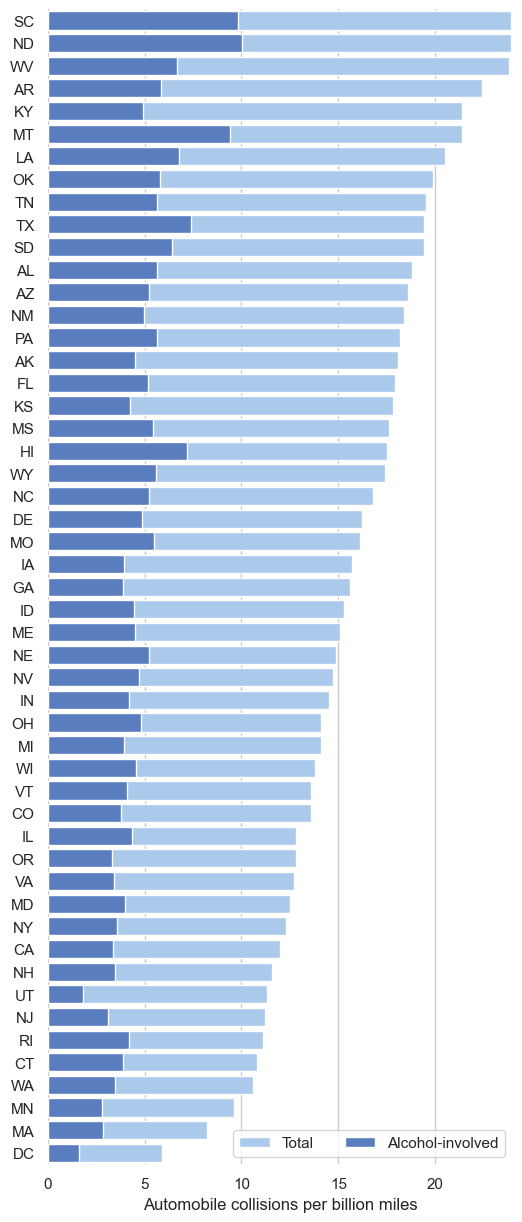

In [39]:
sns.set_theme(style:'whitegrid')

f, ax = plt.subplots(figsize:[6, 15])
crashes = sns.load_dataset('car_crashes')
          .sort_values(:total, ascending:false)

sns.set_color_codes("pastel")
sns.barplot(
  data:crashes,
  x:'total', y:'abbrev',
  label:"Total", color:"b"
)
sns.set_color_codes("muted")
sns.barplot(
  data:crashes,
  x:'alcohol', y:'abbrev',
  label:"Alcohol-involved", color:"b"
)
ax.legend(ncol:2, loc:"lower right", frameon:true)
ax.set(
  xlim:[0, 24],
  xlabel:"Automobile collisions per billion miles",
  ylabel:"",
)
sns.despine(left:true, bottom:true)

### Plotting a three-way ANOVA
https://seaborn.pydata.org/examples/pointplot_anova.html

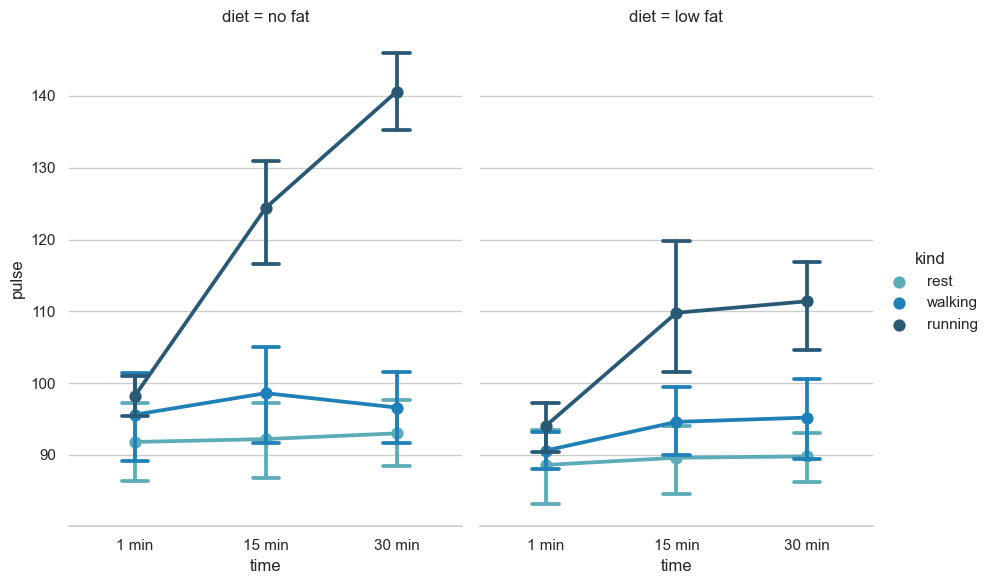

In [40]:
sns.set_theme(style:'whitegrid')
exercise = sns.load_dataset('exercise')

g = sns.catplot(
  data:exercise, kind:'point',
  x:'time', y:'pulse',
  hue:'kind', col:'diet',
  capsize:0.2, palette:"YlGnBu_d",
  height:6, aspect:0.75,
).despine(left:true)

### FacetGrid with custom projection
https://seaborn.pydata.org/examples/radial_facets.html

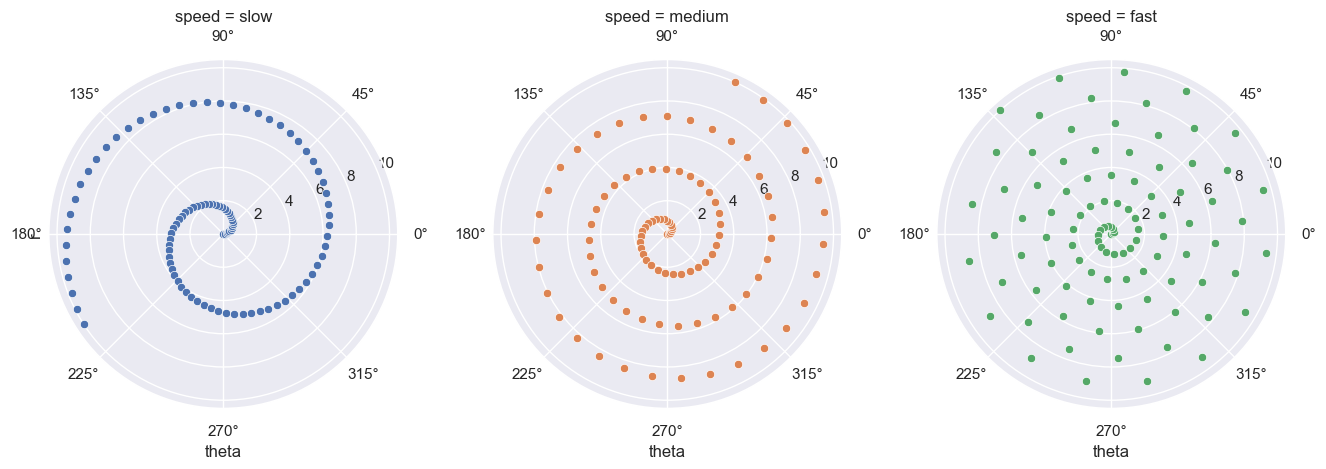

In [41]:
sns.set_theme

r = np.linspace(0, 10, num: 100)
df = pd.DataFrame.new(PyCall::Dict.new({r:r, slow:r, medium:2*r, fast:4*r}))
df = pd.melt(df, id_vars:[:r], var_name:'speed', value_name:'theta')

g = sns.FacetGrid.new(
  data:df,
  col:'speed', hue:'speed',
  subplot_kws:{projection:'polar'},
  height:4.5,
  sharex:false, sharey:false, despine:false,
).map(PyCall.getattr(sns, :scatterplot), "theta", "r")

### Linear regression with marginal distributions
https://seaborn.pydata.org/examples/regression_marginals.html

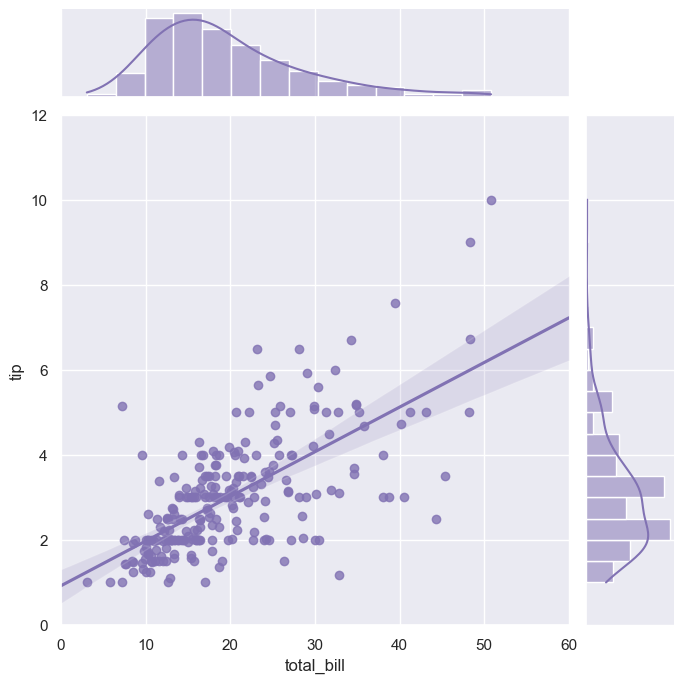

In [42]:
sns.set_theme(style:'darkgrid')
tips = sns.load_dataset('tips')

g = sns.jointplot(
  data:tips,
  x:'total_bill', y:'tip',
  kind:'reg', truncate:false,
  xlim:[0, 60], ylim:[0, 12],
  color:"m", height:7
)

### Plotting model residuals
https://seaborn.pydata.org/examples/residplot.html

<AxesSubplot:>

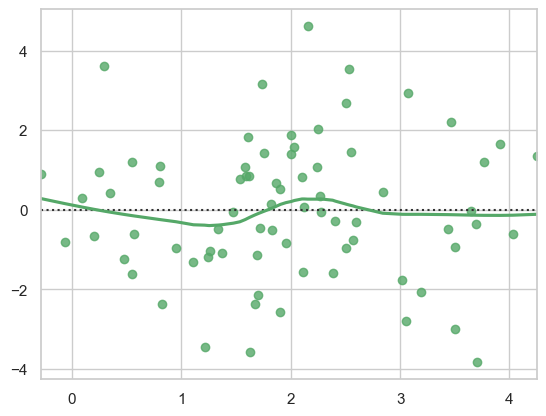

In [43]:
sns.set_theme(style:'whitegrid')

rs = np.random.RandomState.new(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

sns.residplot(x:x, y:y, lowess:true, color:"g")

### Scatterplot with varying point sizes and hues
https://seaborn.pydata.org/examples/scatter_bubbles.html

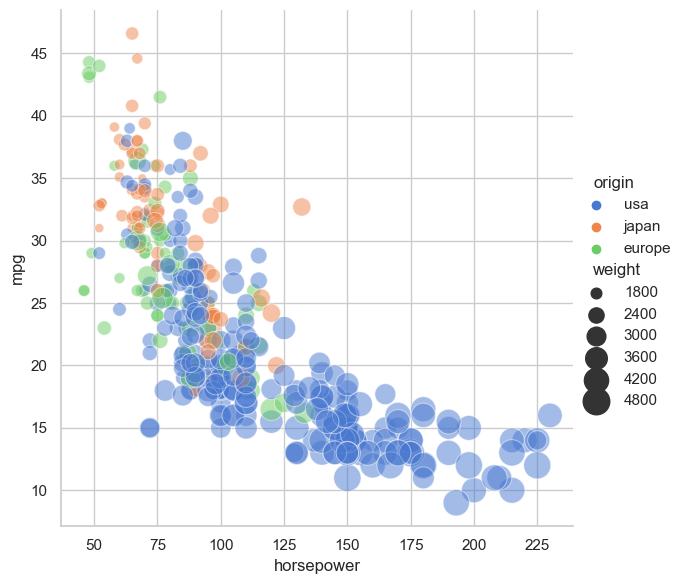

In [44]:
mpg = sns.load_dataset('mpg')

sns.relplot(
  data:mpg,
  x:'horsepower', y:'mpg',
  hue:'origin', size:'weight',
  sizes: PyCall::Tuple.new(40, 400),
  alpha:0.5, palette:"muted",
  height:6,
)

### Scatterplot with categorical variables
https://seaborn.pydata.org/examples/scatterplot_categorical.html

[Text(0, 0.5, '')]

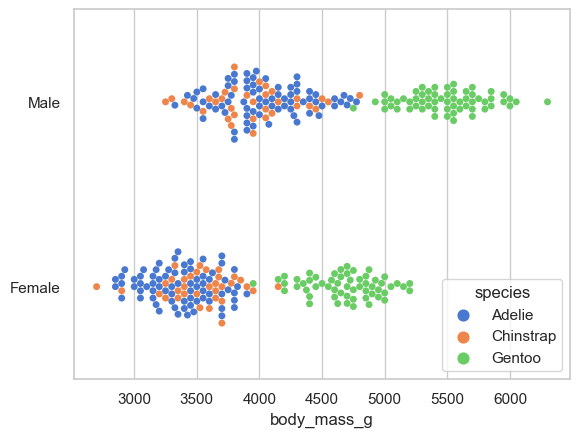

In [45]:
sns.set_theme(style:'whitegrid', palette:'muted')
df = sns.load_dataset('penguins')

ax = sns.swarmplot(
  data:df,
  x:'body_mass_g', y:'sex', hue:'species',
).set(ylabel:"")

### Scatterplot Matrix
https://seaborn.pydata.org/examples/scatterplot_matrix.html

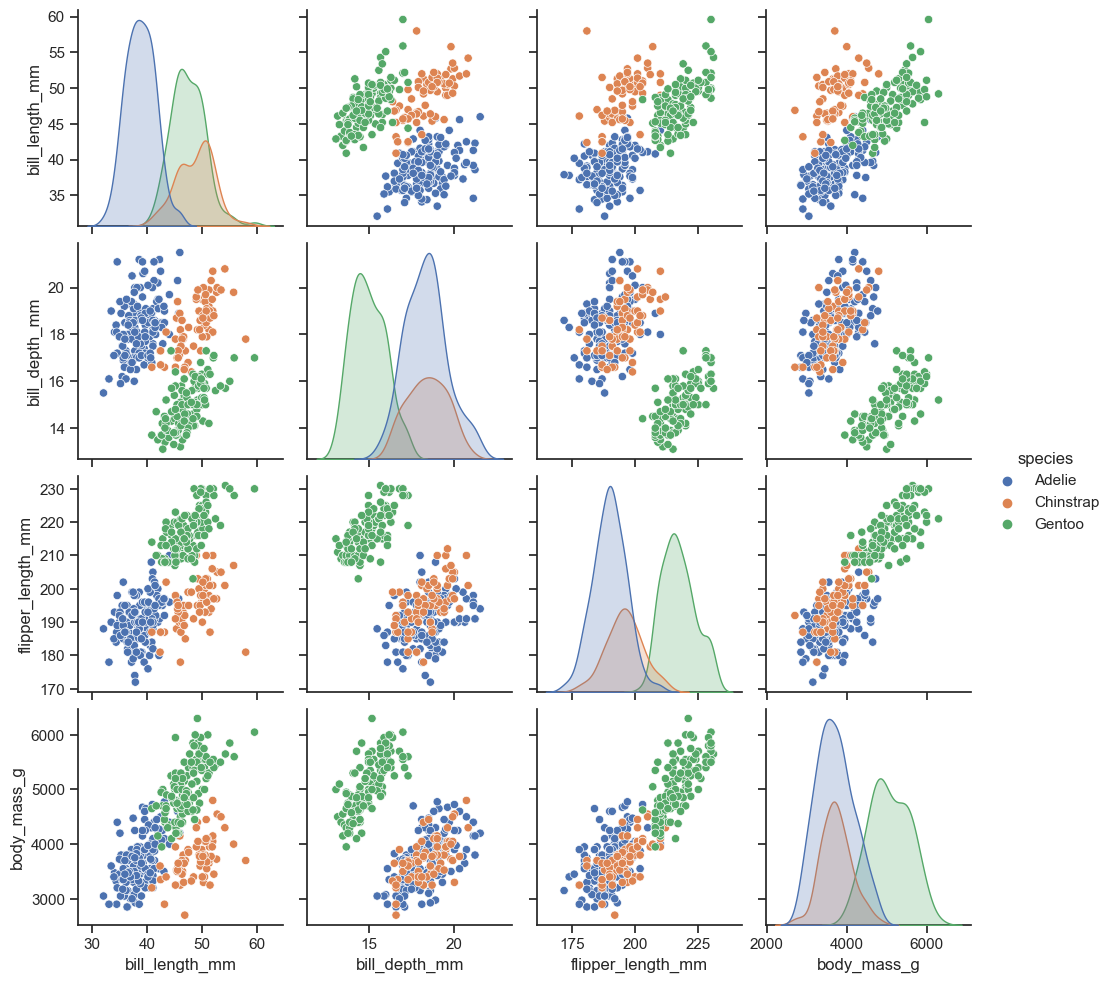

In [46]:
sns.set_theme(style:'ticks')
penguins = sns.load_dataset('penguins')

sns.pairplot(data:penguins, hue:'species')

### Scatterplot with continuous hues and sizes
https://seaborn.pydata.org/examples/scatterplot_sizes.html

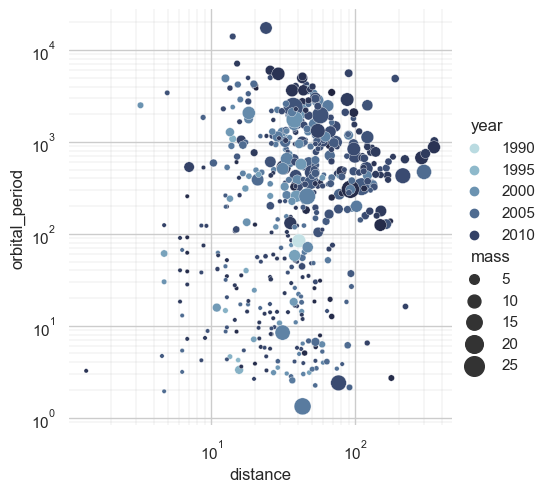

In [47]:
sns.set_theme(style:'whitegrid')
planets = sns.load_dataset('planets')

cmap = sns.cubehelix_palette(rot:-0.2, as_cmap:true)
g = sns.relplot(
  data:planets,
  x:'distance', y:'orbital_period',
  hue:'year', size:'mass',
  palette:cmap,
  sizes: PyCall::Tuple.new(10, 200),
).set(xscale:'log', yscale:'log')
g.ax.xaxis.grid(true, "minor", linewidth:0.25)
g.ax.yaxis.grid(true, "minor", linewidth:0.25)
g.despine(left:true, bottom:true)

### Violinplots with observations
https://seaborn.pydata.org/examples/simple_violinplots.html

<AxesSubplot:>

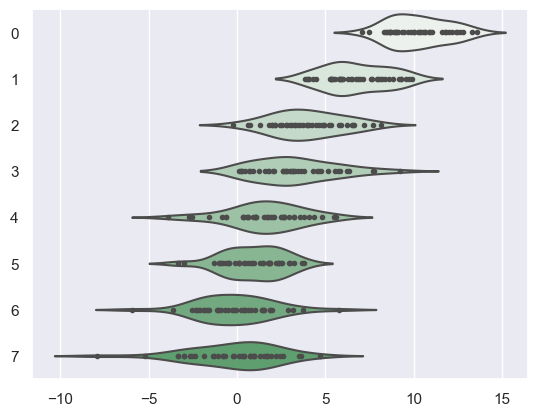

In [48]:
sns.set_theme

rs = np.random.default_rng(0)
n, p = 40, 8
d = rs.normal(0, 2, [n, p])
d += np.log(np.arange(1, p + 1)) * -5 + 10

sns.violinplot(data:d, palette:"light:g", inner:'points', orient:'h')

### Smooth kernel density with marginal histograms
https://seaborn.pydata.org/examples/smooth_bivariate_kde.html

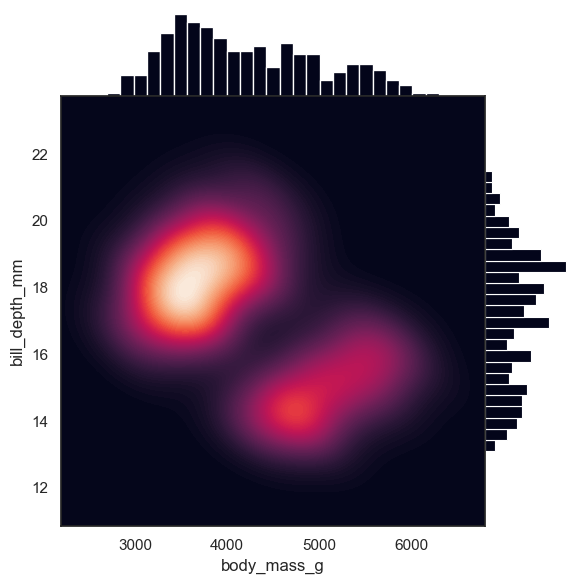

In [49]:
sns.set_theme(style:'white')
penguins = sns.load_dataset('penguins')

g = sns.JointGrid.new(
  data:penguins,
  x:'body_mass_g', y:'bill_depth_mm',
  space:0,
).plot_joint(
  func:PyCall.getattr(sns, :kdeplot),
  fill:true, clip:[[2200, 6800], [10, 25]],
  thresh:0, levels:100, cmap:"rocket",
).plot_marginals(
  func:PyCall.getattr(sns, :histplot),
  color:"#03051A", alpha:1, bins:25,
)

### Annotated heatmaps
https://seaborn.pydata.org/examples/spreadsheet_heatmap.html

<AxesSubplot:xlabel='year', ylabel='month'>

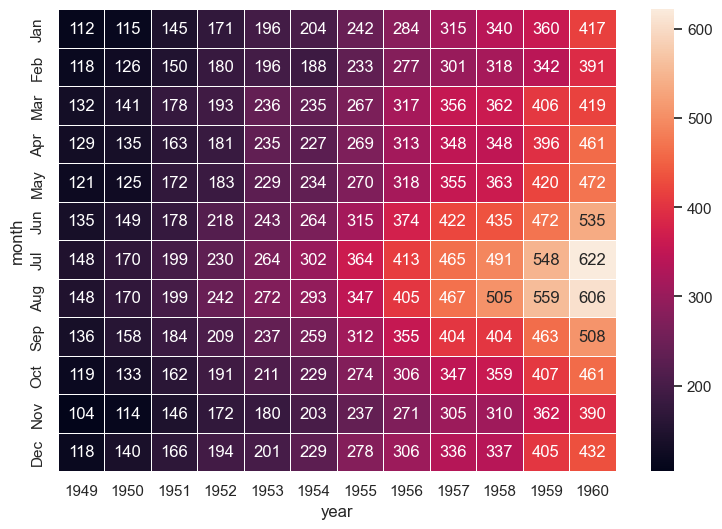

In [50]:
sns.set_theme
flights_long = sns.load_dataset('flights')
flights = flights_long.pivot('month', 'year', 'passengers')

f, ax = plt.subplots(figsize:[9, 6])
sns.heatmap(data:flights, ax:ax, annot:true, fmt:"d", linewidths:0.5)

### Discovering structure in heatmap data
https://seaborn.pydata.org/examples/structured_heatmap.html

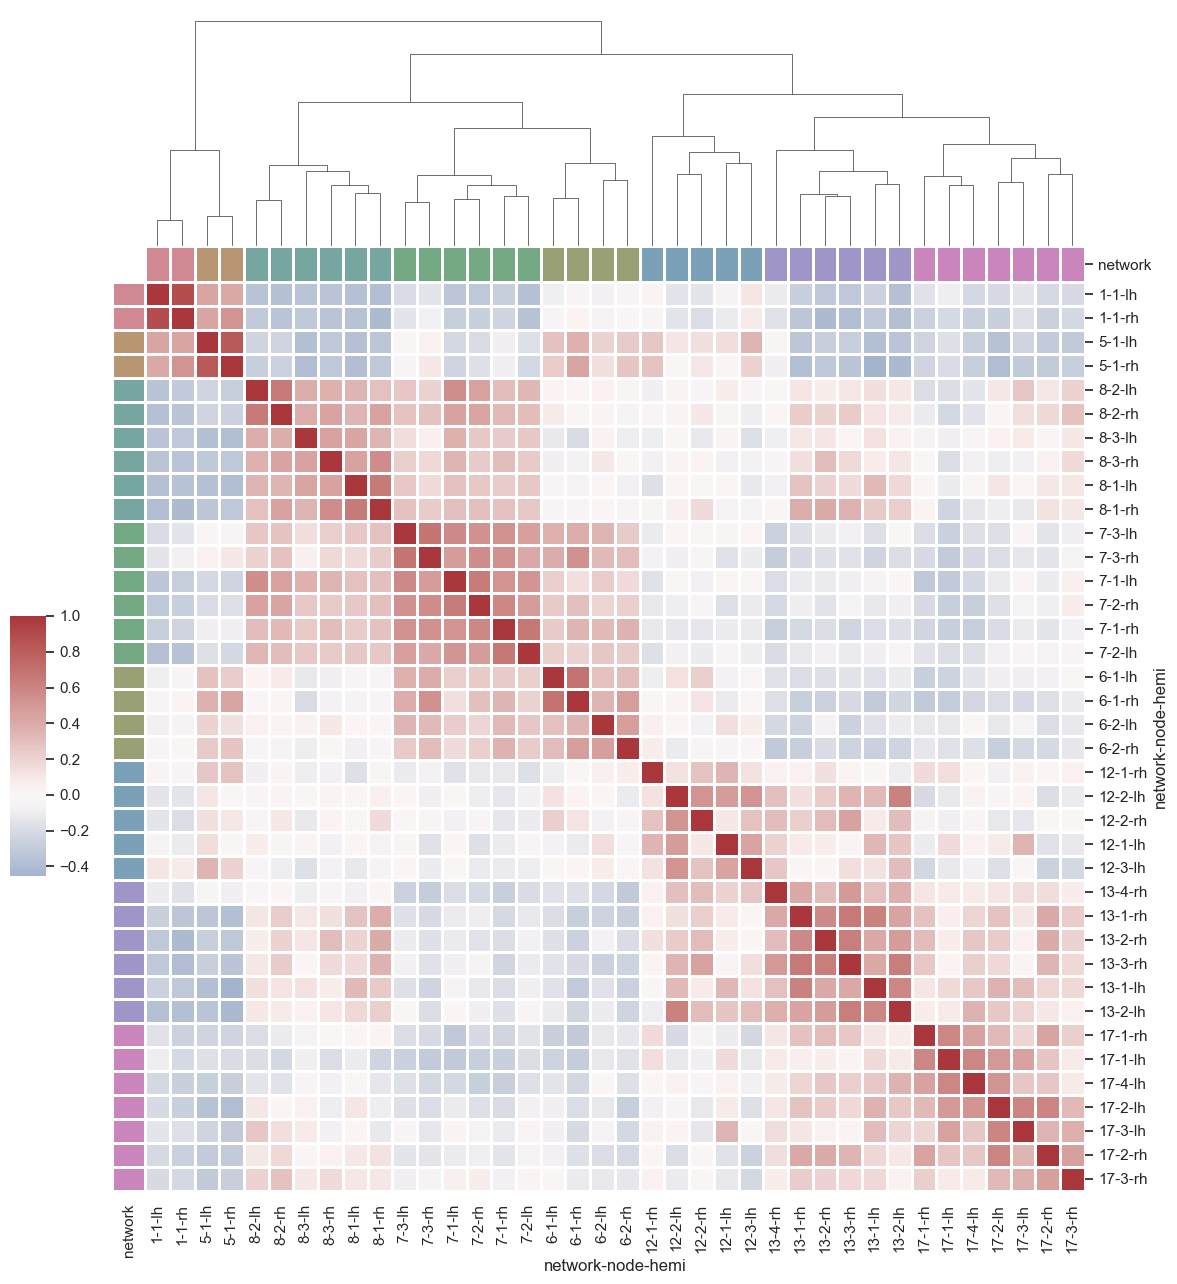

In [51]:
sns.set_theme

df = sns.load_dataset('brain_networks', header:[0, 1, 2], index_col:0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values('network')
                          .astype('int')
                          .isin(used_networks))
df = df.loc[0..-1, used_columns]

network_pal = sns.husl_palette(8, s:0.45)
network_lut = PyCall::Dict.new(used_networks.map(&:to_s).zip(network_pal))
networks = df.columns.get_level_values('network')
network_colors = pd.Series.new(networks, index:df.columns).map(network_lut)

g = sns.clustermap(
  data:df.corr,
  center:0, cmap:"vlag",
  row_colors:network_colors, col_colors:network_colors,
  dendrogram_ratio:[0.1, 0.2],
  cbar_pos:[0.02, 0.32, 0.03, 0.2],
  linewidths:0.75, figsize:[12, 13]
)
g.ax_row_dendrogram.remove

### Trivariate histogram with two categorical variables
https://seaborn.pydata.org/examples/three_variable_histogram.html

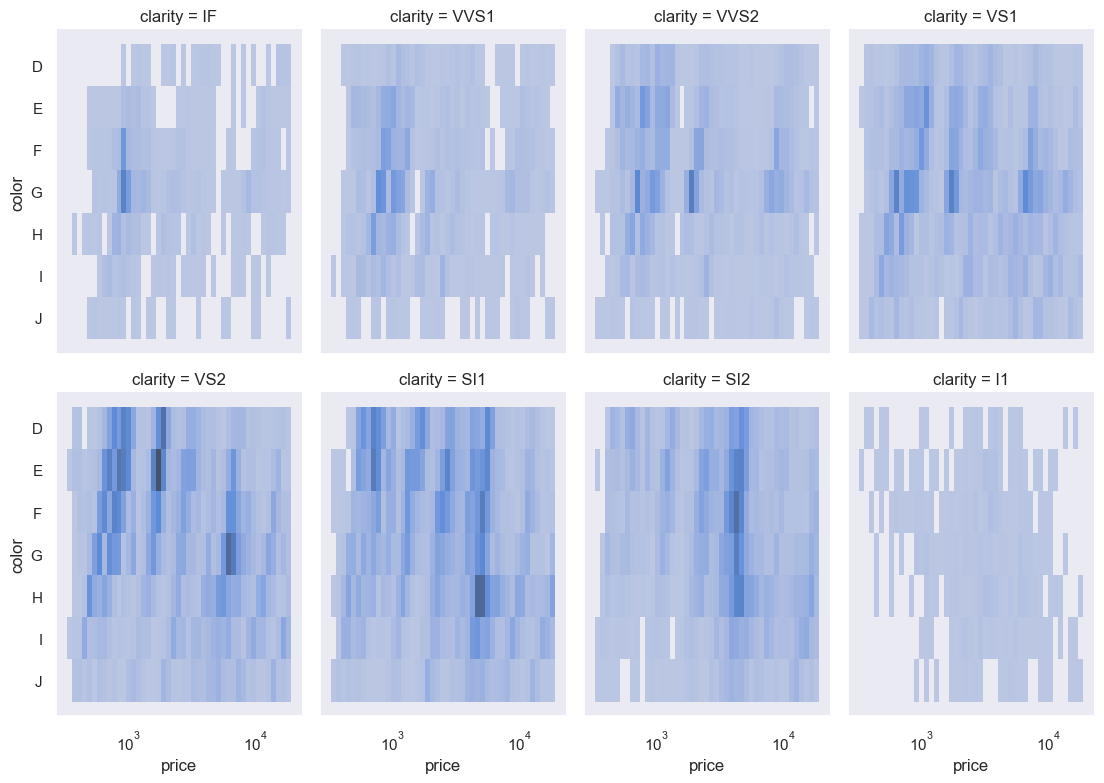

In [52]:
sns.set_theme(style:'dark')
diamonds = sns.load_dataset('diamonds')

sns.displot(
  data:diamonds,
  x:'price', y:'color', col:'clarity',
  log_scale:[true, false],
  col_wrap:4, height:4, aspect:0.7,
)

### Small multiple time series
https://seaborn.pydata.org/examples/timeseries_facets.html

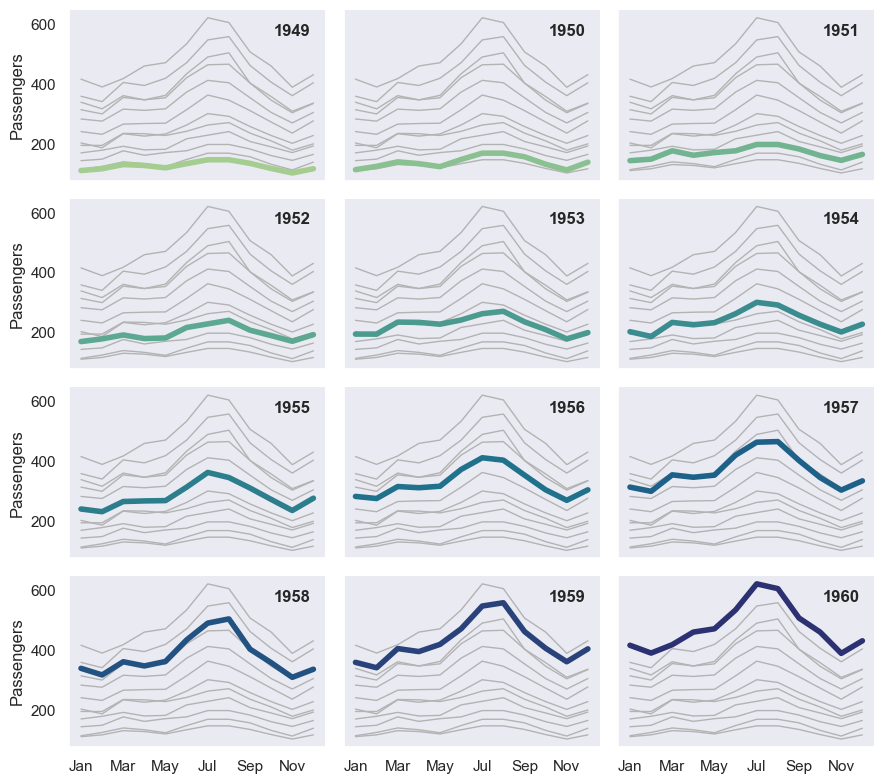

In [53]:
sns.set_theme(style:'dark')
flights = sns.load_dataset('flights')

g = sns.relplot(
  data:flights, kind:'line',
  x:'month', y:'passengers', col:'year', hue:'year',
  palette:'crest', linewidth:4, zorder:5,
  col_wrap:3, height:2, aspect:1.5, legend:false,
)
g.axes_dict.each do |year, ax|
  ax.text(0.8, 0.85, year, transform:ax.transAxes, fontweight:'bold')
  sns.lineplot(
    data:flights, ax:ax,
    x:'month', y:'passengers', units:'year',
    estimator:nil, color:".7", linewidth:1,
  )
  ax.set_xticks([0, 2, 4, 6, 8, 10])
end

g.set_titles("")
g.set_axis_labels("", "Passengers")
g.tight_layout

### Lineplot from a wide-form dataset
https://seaborn.pydata.org/examples/wide_data_lineplot.html

<AxesSubplot:>

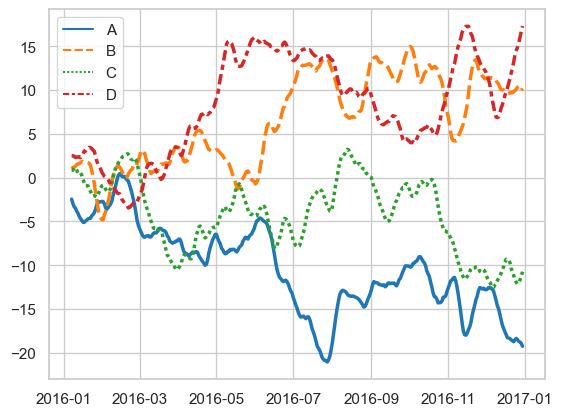

In [54]:
sns.set_theme(style:'whitegrid')

rs = np.random.RandomState.new(365)
values = rs.randn(365, 4).cumsum(axis:0)
dates = pd.date_range("1 1 2016", periods:365, freq:'D')
data = pd.DataFrame.new(values, dates, columns:%w[A B C D])
data = data.rolling(7).mean

sns.lineplot(data:data, palette:"tab10", linewidth:2.5)

### Violinplot from a wide-form dataset
https://seaborn.pydata.org/examples/wide_form_violinplot.html

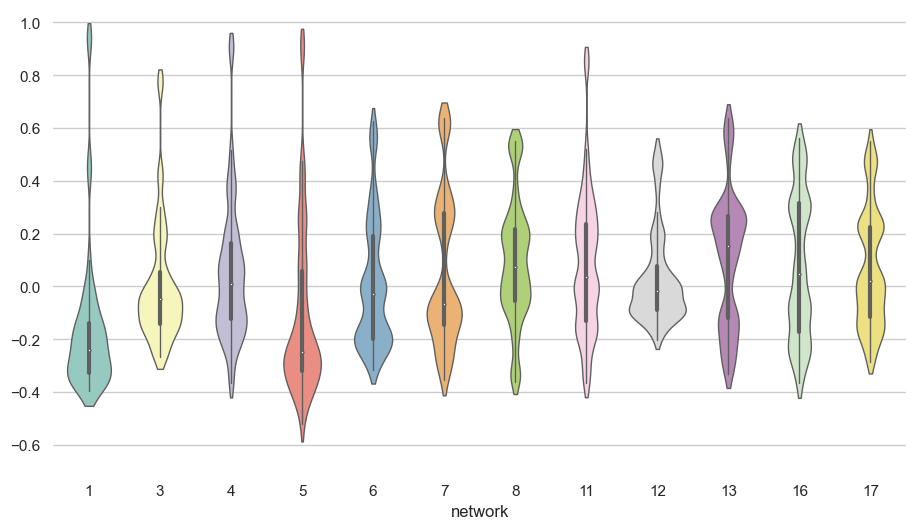

In [55]:
sns.set_theme(style:'whitegrid')

df = sns.load_dataset('brain_networks', header:[0, 1, 2], index_col:0)

used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values('network')
                          .astype('int')
                          .isin(used_networks))
df = df.loc[0..-1, used_columns]
corr_df = df.corr.groupby(level:'network').mean
corr_df.index = corr_df.index.astype('int')
corr_df = corr_df.sort_index.T

f, ax = plt.subplots(figsize:[11, 6])

sns.violinplot(data:corr_df, palette:"Set3", bw:0.2, cut:1, linewidth:1)

ax.set(ylim:[-0.7, 1.05])
sns.despine(left:true, bottom:true)